# Include Packages

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pyarrow
from PIL import Image
import cv2

# Intel Image

## Load the files iteratively

In [ ]:
# https://www.kaggle.com/datasets/puneet6060/intel-image-classification
# download the data and put them inside a folder called 'raw_data/'
data_path    = "data/intel_image/" 
raw_img_path = data_path + "raw_data/"

In [3]:
img_label = ['buildings','forest','glacier','mountain','sea', 'street']
train_test_folder = ['seg_train', 'seg_test']
# img_label = ['buildings','forest']
# train_test_folder = ['seg_test']

In [4]:
img_label_mapping = {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}

In [ ]:
# img_list = []
# label_list = []

In [5]:
def get_image_in_a_folder (path, Y_label=0):
    X_list = []
    Y_list = []  
    image_list= []
    for img_file in os.listdir(path):
        Y_list.append(Y_label)
        image = plt.imread(path+img_file)
        image = cv2.resize (image, (100,100))
        image_list.append(image)
        X_list.append (np.array(image).reshape(-1)) #flatten image
    return X_list, Y_list, image_list

In [8]:
# Load Training and Testing data
for train_test_folder_val in train_test_folder:
    X_list = []
    Y_list = []    
    image_list= []
    for Y_label, val_label in enumerate(img_label):
        _path = raw_img_path+train_test_folder_val+'/'+val_label +'/'

        _X_list, _Y_list, _image_list = get_image_in_a_folder (_path, Y_label)

        X_list.extend(_X_list)
        Y_list.extend(_Y_list)
        image_list.extend(_image_list)                                      
        
    _df = pd.DataFrame({'image':image_list, 'X_flat':X_list, 'Y':Y_list})
    if train_test_folder_val == 'seg_train':
        df_train = _df.copy()
    elif train_test_folder_val == 'seg_test':
        df_test = _df.copy()    

In [9]:
# Load Predicting data without Y label
_path = raw_img_path+'seg_pred/'
_X_list, _Y_list, _image_list = get_image_in_a_folder (_path, Y_label=0)
df_pred = pd.DataFrame({'image':_image_list, 'X_flat':_X_list})

In [10]:
print ('Training data = ', df_train.info())
print ('Testing data  = ', df_test.info())
print ('Prediction data  = ', df_pred.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14034 entries, 0 to 14033
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   14034 non-null  object
 1   X_flat  14034 non-null  object
 2   Y       14034 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 329.1+ KB
Training data =  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3000 non-null   object
 1   X_flat  3000 non-null   object
 2   Y       3000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 70.4+ KB
Testing data  =  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7301 entries, 0 to 7300
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   7301 non-null   object
 1   X_flat  7301 non-null   object
dtypes: object(2)
memory usag

In [11]:
df_test.head(2)

,image,X_flat,Y
0,"[[[99, 126, 177], [114, 138, 181], [175, 195, ...","[99, 126, 177, 114, 138, 181, 175, 195, 220, 2...",0
1,"[[[111, 183, 223], [109, 183, 221], [109, 183,...","[111, 183, 223, 109, 183, 221, 109, 183, 221, ...",0


In [12]:
df_test.Y.value_counts()

Y
2    553
3    525
4    510
5    501
1    474
0    437
Name: count, dtype: int64

In [14]:
df_train.Y.value_counts()

Y
3    2512
2    2404
5    2382
4    2274
1    2271
0    2191
Name: count, dtype: int64

In [15]:
# the original image is 150x150 with 3 channels, then resize into 100x100 with 3 channels
print ('image = ', df_test.iloc[0].image.shape)

print (df_test.iloc[0].image[0:1,0:3])

print ('X = ', df_test.iloc[0].X_flat.shape)
print (df_test.iloc[0].X_flat)

image =  (100, 100, 3)
[[[ 99 126 177]
  [114 138 181]
  [175 195 220]]]
X =  (30000,)
[ 99 126 177 ... 233 240 250]


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14034 entries, 0 to 14033
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   14034 non-null  object
 1   X_flat  14034 non-null  object
 2   Y       14034 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 329.1+ KB


In [17]:
len (df_train)

14034

## Show sample random images

In [18]:
def print_random_15_images (df_image, df_Y, title='Intel Images'):
    n = 15
    nrow = 3 
    ncol = int (n/nrow)
    fig, ax = plt.subplots (nrows=nrow, ncols=ncol, figsize=(20,10))
    fig.suptitle(title)
    for i in range(n):
        idx = np.random.randint(0, len(df_image))

        _row = i//ncol
        _col = i%ncol
        ax[_row,_col].imshow(df_image[idx])
        ax[_row,_col].set_title(img_label_mapping[df_Y[idx]])
        ax[_row,_col].axis('off')        

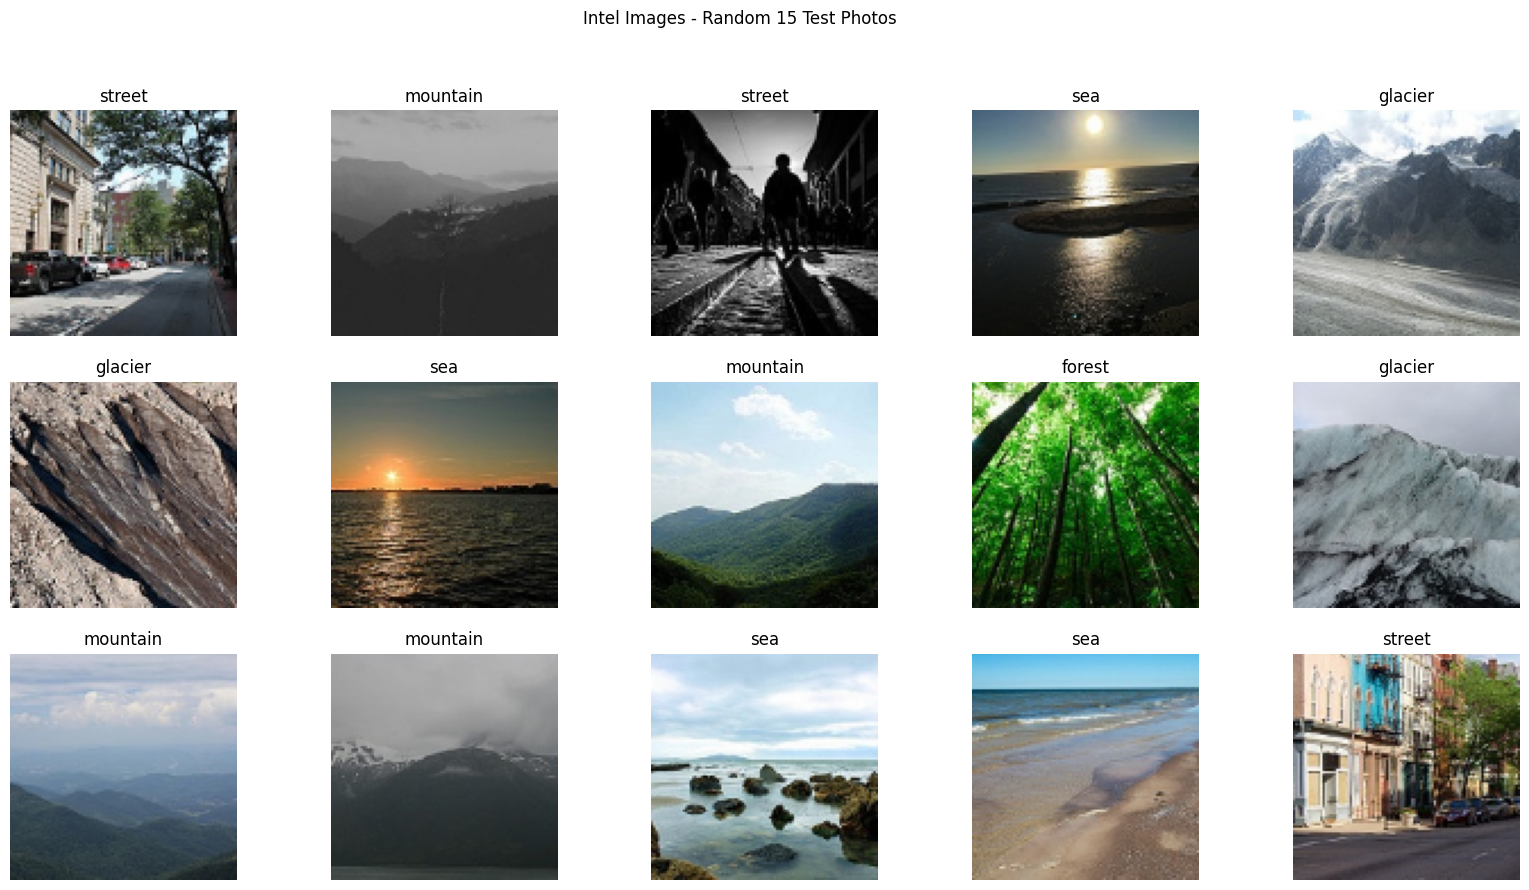

In [21]:
print_random_15_images (df_test['image'], df_test['Y'], 'Intel Images - Random 15 Test Photos')

## Save file

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3000 non-null   object
 1   X_flat  3000 non-null   object
 2   Y       3000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


In [23]:
_path = data_path + "processed_data/" 
pd.DataFrame(df_train['X_flat']).to_parquet(_path + 'training_X.parquet')
pd.DataFrame(df_train['Y']).to_parquet(_path +  'training_Y.parquet')

pd.DataFrame(df_test['X_flat']).to_parquet(_path + 'testing_X.parquet')
pd.DataFrame(df_test['Y']).to_parquet(_path +  'testing_Y.parquet')

pd.DataFrame(df_pred['X_flat']).to_parquet(_path + 'pred_X.parquet')

## Try to load it back

In [24]:
_path = data_path + "processed_data/" 
_df = pd.read_parquet(_path + 'testing_X.parquet')
_df['X'] = _df['X_flat'].apply(lambda x: x.reshape(100, 100, 3))
_df2 = pd.read_parquet(_path + 'testing_Y.parquet')


In [25]:
print (_df.info())
print (_df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X_flat  3000 non-null   object
 1   X       3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB
None


In [26]:
df_test_upload = pd.DataFrame({'X': _df['X'], 'Y': _df2['Y']})
print(df_test_upload.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       3000 non-null   object
 1   Y       3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB
None


In [27]:
df_test_upload.iloc[0].X.shape

(100, 100, 3)

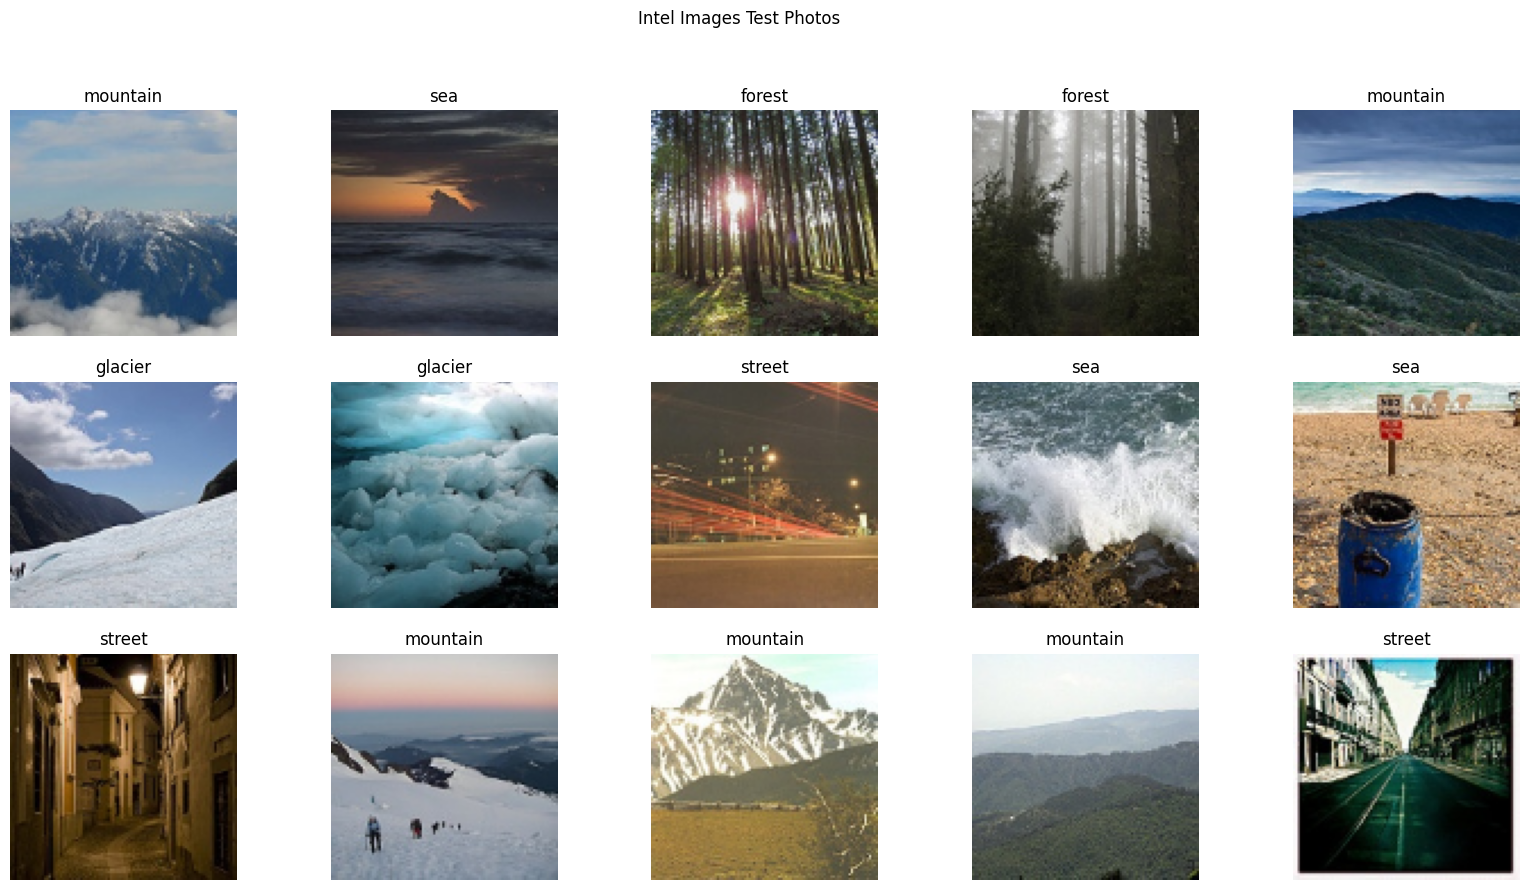

In [28]:
print_random_15_images (df_test_upload['X'], df_test_upload['Y'], 'Intel Images Test Photos')

In [ ]:
# Some data are not in 150*150 shape
# for i in range (len(_df)):
#     if _df.iloc[i].X_flat.shape != (67500,):
#         print (i, _df.iloc[i].X_flat.shape)

641 (63450,)
1068 (49500,)
1117 (34200,)
1152 (67050,)
1308 (32400,)
1714 (58950,)
1810 (36450,)
